In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func, desc
from matplotlib.ticker import NullFormatter
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
from flask import Flask, jsonify
import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [8]:
# Precipitation Analysis
prcp_df = pd.concat([pd.DataFrame(session.query(Measurement.prcp).all()), 
                pd.DataFrame(session.query(Measurement.date).all())], axis=1)
prcp_df = prcp_df.iloc[:365,:]
prcp_df.head(), prcp_df.tail()

(   prcp        date
 0  0.08  2010-01-01
 1  0.00  2010-01-02
 2  0.00  2010-01-03
 3  0.00  2010-01-04
 4  0.06  2010-01-07,      prcp        date
 360  0.00  2011-02-16
 361  0.00  2011-02-19
 362  1.72  2011-02-20
 363  0.00  2011-02-21
 364  0.82  2011-02-22)

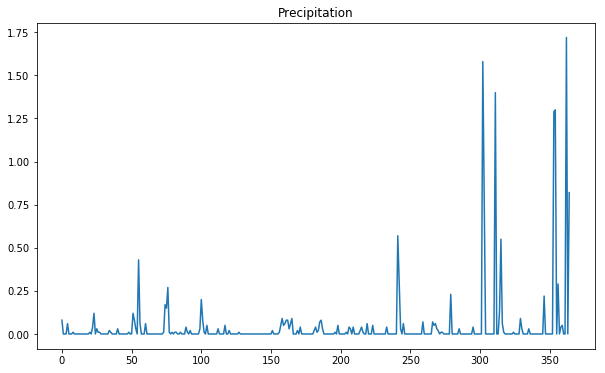

In [13]:
# Precipitation vs Date
dates = prcp_df.index
plt.figure(figsize=(10,6))
plt.title('Precipitation')
plt.plot(dates, prcp_df['prcp'])

plt.show()

In [12]:
# Statistical Summary
prcp_df.describe()

,prcp
count,365.000000
mean,0.043151
std,0.187683
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,1.720000


In [14]:
# Station Analysis

stations = pd.DataFrame(session.query(Station.station).all())
stations

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [18]:
# Most observations
# USC00519281 has highest number of observations
station_obs = pd.DataFrame(session.query(Measurement.station).all()).station.value_counts()
station_obs

USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64

In [22]:
# tobs for station with highest number of observations
tobs_df = pd.concat([pd.DataFrame(session.query(Measurement.tobs).all()), 
                pd.DataFrame(session.query(Measurement.station).all())], axis=1)
tobs_df = tobs_df[tobs_df['station'] == station_obs.index[0]]
tobs_df.head()

,tobs,station
10915,70.0,USC00519281
10916,62.0,USC00519281
10917,74.0,USC00519281
10918,75.0,USC00519281
10919,74.0,USC00519281


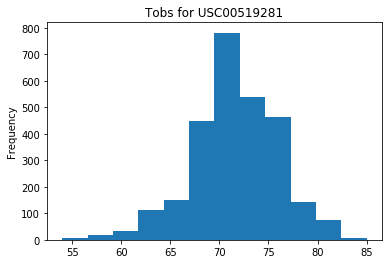

In [23]:
plt.hist(tobs_df['tobs'], bins=12)
plt.title('Tobs for USC00519281')
plt.ylabel('Frequency')
plt.show()

In [24]:
calc_temps = session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= '2011-01-01').\
    filter(Measurement.date <= '2012-01-01').\
    group_by(Measurement.date).order_by(Measurement.date.desc()).all()

In [28]:
I = range(len(calc_temps))
dates = [calc_temps[i][0] for i in I]
minimum = [calc_temps[i][1] for i in I]
average = [calc_temps[i][2] for i in I]
maximum = [calc_temps[i][3] for i in I]

calc_temps_df = pd.DataFrame({'date':dates,
                              'min':minimum,
                              'ave':average,
                              'max':maximum})

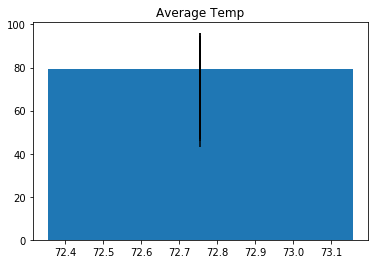

In [29]:
x = calc_temps_df['ave'].mean()
y = calc_temps_df['ave']
error = max(calc_temps_df['max'] - calc_temps_df['min'])

plt.bar(x, y, yerr=error)
plt.title('Average Temp')
plt.show()